In [1]:
"""1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

For Naive Bayes assignments your work is good.
Your data scaling and label encoding is good.
Explore on visualizations.your model building and accuracy is also good.
Explore on feature engineering and feature selection for better performance of models."""

'1) Prepare a classification model using Naive Bayes \nfor salary data \n\nData Description:\n\nage -- age of a person\nworkclass\t-- A work class is a grouping of work \neducation\t-- Education of an individuals\t\nmaritalstatus -- Marital status of an individulas\t\noccupation\t -- occupation of an individuals\nrelationship -- \t\nrace --  Race of an Individual\nsex --  Gender of an Individual\ncapitalgain --  profit received from the sale of an investment\t\ncapitalloss\t-- A decrease in the value of a capital asset\nhoursperweek -- number of hours work per week\t\nnative -- Native of an individual\nSalary -- salary of an individual\n\nFor Naive Bayes assignments your work is good.\nYour data scaling and label encoding is good.\nExplore on visualizations.your model building and accuracy is also good.\nExplore on feature engineering and feature selection for better performance of models.'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_test = pd.read_csv("SalaryData_Test.csv")
df_train = pd.read_csv("SalaryData_Train.csv")
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df_test.isnull().sum()
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
X = df_train.iloc[:,0:13]
Y = df_train[["Salary"]]


In [14]:
#OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
Y = OHE.fit_transform(df_train[["Salary"]]).toarray()
# Convert to a 1-dimensional array
Y = np.argmax(Y, axis=1)

Y_test = OHE.fit_transform(df_test[["Salary"]]).toarray()
# Convert to a 1-dimensional array
Y_test = np.argmax(Y_test, axis=1)


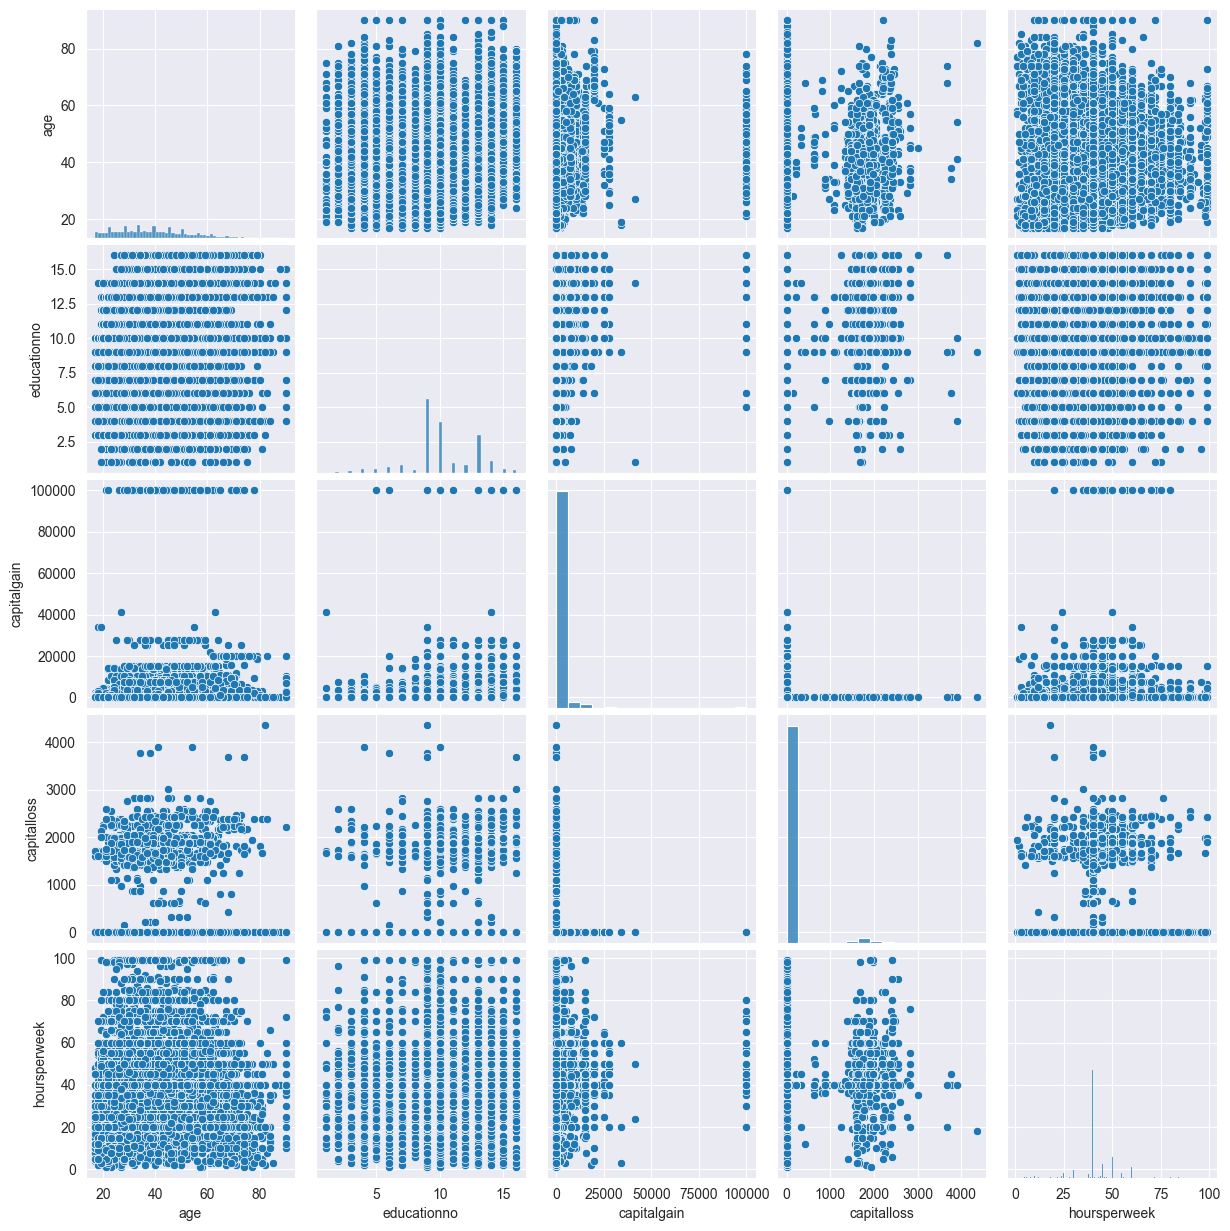

In [15]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(df_train)
plt.show()

In [16]:
#Data scaling
#Min_Max Scaler
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
df_test.iloc[:,[0,3,9,10,11]] = mm.fit_transform(df_test.iloc[:,[0,3,9,10,11]])
df_test.iloc[:,[0,3,9,10,11]] = pd.DataFrame(df_test.iloc[:,[0,3,9,10,11]])
df_test.iloc[:,[0,3,9,10,11]]

df_train.iloc[:,[0,3,9,10,11]] = mm.fit_transform(df_train.iloc[:,[0,3,9,10,11]])
df_train.iloc[:,[0,3,9,10,11]] = pd.DataFrame(df_train.iloc[:,[0,3,9,10,11]])
df_train.iloc[:,[0,3,9,10,11]]
df_train
print(df_test.iloc[:,[0,3,9,10,11]])
print(df_train.iloc[:,[0,3,9,10,11]])



            age  educationno  capitalgain  capitalloss  hoursperweek
0      0.109589     0.400000     0.000000          0.0      0.397959
1      0.287671     0.533333     0.000000          0.0      0.500000
2      0.150685     0.733333     0.000000          0.0      0.397959
3      0.369863     0.600000     0.076881          0.0      0.397959
4      0.232877     0.333333     0.000000          0.0      0.295918
...         ...          ...          ...          ...           ...
15055  0.219178     0.800000     0.000000          0.0      0.397959
15056  0.301370     0.800000     0.000000          0.0      0.357143
15057  0.287671     0.800000     0.000000          0.0      0.500000
15058  0.369863     0.800000     0.054551          0.0      0.397959
15059  0.246575     0.800000     0.000000          0.0      0.602041

[15060 rows x 5 columns]
            age  educationno  capitalgain  capitalloss  hoursperweek
0      0.301370     0.800000     0.021740          0.0      0.397959
1      0

In [17]:

#Label_Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder() 
df_test.iloc[:,1] = LE.fit_transform(df_test.iloc[:,1])
df_test.iloc[:,2] = LE.fit_transform(df_test.iloc[:,2])
df_test.iloc[:,4] = LE.fit_transform(df_test.iloc[:,4])
df_test.iloc[:,5] = LE.fit_transform(df_test.iloc[:,5])
df_test.iloc[:,6] = LE.fit_transform(df_test.iloc[:,6])
df_test.iloc[:,7] = LE.fit_transform(df_test.iloc[:,7])
df_test.iloc[:,8] = LE.fit_transform(df_test.iloc[:,8])
df_test.iloc[:,12] = LE.fit_transform(df_test.iloc[:,12])

df_train.iloc[:,1] = LE.fit_transform(df_train.iloc[:,1])
df_train.iloc[:,2] = LE.fit_transform(df_train.iloc[:,2])
df_train.iloc[:,4] = LE.fit_transform(df_train.iloc[:,4])
df_train.iloc[:,5] = LE.fit_transform(df_train.iloc[:,5])
df_train.iloc[:,6] = LE.fit_transform(df_train.iloc[:,6])
df_train.iloc[:,7] = LE.fit_transform(df_train.iloc[:,7])
df_train.iloc[:,8] = LE.fit_transform(df_train.iloc[:,8])
df_train.iloc[:,12] = LE.fit_transform(df_train.iloc[:,12])
df_train

C:\Users\Acer\AppData\Local\Temp\ipykernel_4668\2937272311.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_test.iloc[:,1] = LE.fit_transform(df_test.iloc[:,1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_4668\2937272311.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_test.iloc[:,2] = LE.fit_transform(df_test.iloc[:,2])
C:\Users\Acer\AppData\Local\Temp\ipykernel_4668\2937272311.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,5,9,0.800000,4,0,1,4,1,0.021740,0.0,0.397959,37,<=50K
1,0.452055,4,9,0.800000,2,3,0,4,1,0.000000,0.0,0.122449,37,<=50K
2,0.287671,2,11,0.533333,0,5,1,4,1,0.000000,0.0,0.397959,37,<=50K
3,0.493151,2,1,0.400000,2,5,0,2,1,0.000000,0.0,0.397959,37,<=50K
4,0.150685,2,9,0.800000,2,9,5,2,0,0.000000,0.0,0.397959,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,2,7,0.733333,2,12,5,4,0,0.000000,0.0,0.377551,37,<=50K
30157,0.315068,2,11,0.533333,2,6,0,4,1,0.000000,0.0,0.397959,37,>50K
30158,0.561644,2,11,0.533333,6,0,4,4,0,0.000000,0.0,0.397959,37,<=50K
30159,0.068493,2,11,0.533333,4,0,3,4,1,0.000000,0.0,0.193878,37,<=50K


In [18]:
X = df_train.iloc[:,0:13]
Y


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [19]:
# Splitting Train and Test
from sklearn.model_selection._split import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.30,random_state=10)


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
    
y_pred_train = MNB.predict(X_train)
y_pred_test = MNB.predict(df_test.iloc[:,:13])
    
train_accuracy= accuracy_score(Y_train, y_pred_train)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print(train_accuracy)
print(test_accuracy)

0.7684255399772641
0.7687250996015936


In [21]:
#Lasso Regression

#model fitting 

from sklearn.linear_model import Lasso
lass = Lasso(alpha= 1)
lass.fit(X_train, Y_train)

y_pred_train = lass.predict(X_train)
y_pred_test = lass.predict(df_test.iloc[:,:13])

pd.DataFrame(lass.coef_)
pd.DataFrame(X.columns)
pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lass.coef_)], axis = 1)

,0,0
0,age,0.0
1,workclass,0.0
2,education,0.0
3,educationno,0.0
4,maritalstatus,-0.0
5,occupation,0.0
6,relationship,-0.0
7,race,0.0
8,sex,0.0
9,capitalgain,0.0


In [22]:
#Ridge Regression
#model fitting 

from sklearn.linear_model import Ridge
RR = Ridge(alpha= 10) 
RR.fit(X_train, Y_train)

y_pred_train = RR.predict(X_train)
y_pred_test = RR.predict(df_test.iloc[:,:13])

pd.DataFrame(RR.coef_)
pd.DataFrame(X.columns)
pd.concat([pd.DataFrame(X.columns), pd.DataFrame(RR.coef_)], axis =1)

,0,0
0,age,0.373686
1,workclass,-0.016627
2,education,-0.003551
3,educationno,0.735586
4,maritalstatus,-0.025775
5,occupation,0.001673
6,relationship,-0.016391
7,race,0.014819
8,sex,0.114185
9,capitalgain,0.846002


In [23]:
#Recoding- data cleaning
X_new_train = df_train.drop(df_train.columns[[1,2,4,5,6,7,12,13]], axis = 1)
list(X_new_train)

['age', 'educationno', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek']

In [24]:
X_new_test = df_test.drop(df_test.columns[[1,2,4,5,6,7,12,13]], axis = 1)
list(X_new_test)

['age', 'educationno', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek']

In [25]:
X_new_train
Y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [26]:
# Splitting Train and Test
from sklearn.model_selection._split import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_new_train,Y,test_size=0.30,random_state=10)


In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
    
y_pred_train = MNB.predict(X_train)
y_pred_test = MNB.predict(X_new_test)

train_accuracy= accuracy_score(Y_train, y_pred_train)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print(train_accuracy)
print(test_accuracy)

0.7553524062144752
0.7596281540504648
